In [1]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as sns
from sklearn.model_selection import (
    train_test_split, 
    KFold, 
    StratifiedKFold, 
    GridSearchCV
)
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    accuracy_score, 
    f1_score, 
    precision_recall_curve, 
    plot_confusion_matrix,
    auc
)
from sklearn.preprocessing import (
    StandardScaler, 
    MinMaxScaler, 
    LabelEncoder, 
    LabelBinarizer
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [2]:
df = pd.read_csv('heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
df.shape

(319795, 18)

In [4]:
yes_no_cols = [
    'HeartDisease',
    'Smoking',
    'AlcoholDrinking',
    'Stroke',
    'DiffWalking',
    'Diabetic',
    'PhysicalActivity',
]
male_female_cols = ['Sex']
race_cols = ['Race']
gen_health = ['GenHealth']
age_cols = ['AgeCategory']
numeric_cols = ['BMI', 'PhysicalHeath', 'MentalHealth', 'SleepTime']

In [5]:
for cols in yes_no_cols:
    df[cols] = df[cols].map({
        'Yes' : 1, 
        'No'  : 0
    })

In [6]:
for cols in male_female_cols:
    df[cols] = df[cols].map({
        'Male' : 1, 
        'Female'  : 0
    })

In [7]:
age_freq = df[age_cols].value_counts().sort_index().to_dict()
key = [k[0] for k in age_freq.keys()]

In [8]:
final_freq = {}
for age in key:
    final_freq[age] = age_freq[(age,)]
age_freq = final_freq

In [9]:
for cols in age_cols:
    df[cols] = df[cols].map(age_freq)

In [10]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,29757,White,1.0,1,Very good,5.0,Yes,No,Yes
1,0,20.34,0,0,1,0.0,0.0,0,0,24153,White,0.0,1,Very good,7.0,No,No,No
2,0,26.58,1,0,0,20.0,30.0,0,1,34151,White,1.0,1,Fair,8.0,Yes,No,No
3,0,24.21,0,0,0,0.0,0.0,0,0,21482,White,0.0,0,Good,6.0,No,No,Yes
4,0,23.71,0,0,0,28.0,0.0,1,0,21006,White,0.0,1,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,33686,Hispanic,1.0,0,Fair,6.0,Yes,No,No
319791,0,29.84,1,0,0,0.0,0.0,0,1,20550,Hispanic,0.0,1,Very good,5.0,Yes,No,No
319792,0,24.24,0,0,0,0.0,0.0,0,0,21791,Hispanic,0.0,1,Good,6.0,No,No,No
319793,0,32.81,0,0,0,0.0,0.0,0,0,16955,Hispanic,0.0,0,Good,12.0,No,No,No


In [11]:
race_freq = df[race_cols].value_counts().sort_index().to_dict()
key = [k[0] for k in race_freq.keys()]

In [12]:
final_freq = {}
for race in key:
    final_freq[race] = race_freq[(race,)]
race_freq = final_freq

In [13]:
race_freq

{'American Indian/Alaskan Native': 5202,
 'Asian': 8068,
 'Black': 22939,
 'Hispanic': 27446,
 'Other': 10928,
 'White': 245212}

In [14]:
for cols in race_cols:
    df[cols] = df[cols].map(race_freq)

In [15]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,29757,245212,1.0,1,Very good,5.0,Yes,No,Yes
1,0,20.34,0,0,1,0.0,0.0,0,0,24153,245212,0.0,1,Very good,7.0,No,No,No
2,0,26.58,1,0,0,20.0,30.0,0,1,34151,245212,1.0,1,Fair,8.0,Yes,No,No
3,0,24.21,0,0,0,0.0,0.0,0,0,21482,245212,0.0,0,Good,6.0,No,No,Yes
4,0,23.71,0,0,0,28.0,0.0,1,0,21006,245212,0.0,1,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,33686,27446,1.0,0,Fair,6.0,Yes,No,No
319791,0,29.84,1,0,0,0.0,0.0,0,1,20550,27446,0.0,1,Very good,5.0,Yes,No,No
319792,0,24.24,0,0,0,0.0,0.0,0,0,21791,27446,0.0,1,Good,6.0,No,No,No
319793,0,32.81,0,0,0,0.0,0.0,0,0,16955,27446,0.0,0,Good,12.0,No,No,No


In [16]:
gen_freq = df[gen_health].value_counts().sort_index().to_dict()
key = [k[0] for k in gen_freq.keys()]

In [17]:
gen_freq

{('Excellent',): 66842,
 ('Fair',): 34677,
 ('Good',): 93129,
 ('Poor',): 11289,
 ('Very good',): 113858}

In [18]:
final_freq = {}
for gen in key:
    final_freq[gen] = gen_freq[(gen,)]
gen_freq = final_freq

In [19]:
for cols in gen_health:
    df[cols] = df[cols].map(gen_freq)

In [20]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,29757,245212,1.0,1,113858,5.0,Yes,No,Yes
1,0,20.34,0,0,1,0.0,0.0,0,0,24153,245212,0.0,1,113858,7.0,No,No,No
2,0,26.58,1,0,0,20.0,30.0,0,1,34151,245212,1.0,1,34677,8.0,Yes,No,No
3,0,24.21,0,0,0,0.0,0.0,0,0,21482,245212,0.0,0,93129,6.0,No,No,Yes
4,0,23.71,0,0,0,28.0,0.0,1,0,21006,245212,0.0,1,113858,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,33686,27446,1.0,0,34677,6.0,Yes,No,No
319791,0,29.84,1,0,0,0.0,0.0,0,1,20550,27446,0.0,1,113858,5.0,Yes,No,No
319792,0,24.24,0,0,0,0.0,0.0,0,0,21791,27446,0.0,1,93129,6.0,No,No,No
319793,0,32.81,0,0,0,0.0,0.0,0,0,16955,27446,0.0,0,93129,12.0,No,No,No


### Evaluation

In [21]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

### Asthma

The number of classes before fit Counter({0: 276923, 1: 42872})
The number of classes after fit Counter({0: 276923, 1: 138461})


[15:38:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643227205751/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Training:
---------
              precision    recall  f1-score   support

           0       0.72      0.93      0.81    249231
           1       0.68      0.29      0.41    124614

    accuracy                           0.72    373845
   macro avg       0.70      0.61      0.61    373845
weighted avg       0.71      0.72      0.68    373845



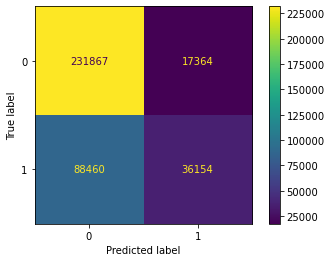

Accuracy: 0.7169308135724699
Precision: 0.6755484136178482
Recall: 0.2901279150015247
F1 Score: 0.40592369703366044
Cohens Kappa Score: 0.25713365329652416
Area Under Curve: 0.7194087299724798
Confusion Matrix:
 [[231867  17364]
 [ 88460  36154]]

Testing:
--------
              precision    recall  f1-score   support

           0       0.71      0.91      0.80     27692
           1       0.61      0.27      0.37     13847

    accuracy                           0.70     41539
   macro avg       0.66      0.59      0.59     41539
weighted avg       0.68      0.70      0.66     41539



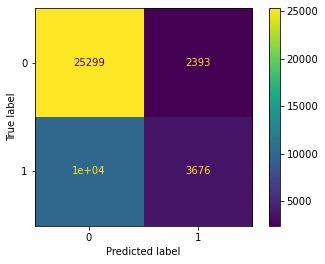

Accuracy: 0.6975372541467055
Precision: 0.6057011039710002
Recall: 0.2654726655593269
F1 Score: 0.3691504318136172
Cohens Kappa Score: 0.20830786228773834
Area Under Curve: 0.6903394733561923
Confusion Matrix:
 [[25299  2393]
 [10171  3676]]

Total:
------
              precision    recall  f1-score   support

           0       0.72      0.93      0.81    276923
           1       0.67      0.29      0.40    138461

    accuracy                           0.71    415384
   macro avg       0.70      0.61      0.61    415384
weighted avg       0.70      0.71      0.68    415384



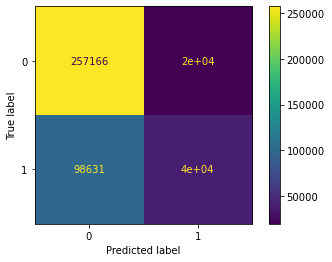

Accuracy: 0.7149914296169327
Precision: 0.6684343900515213
Recall: 0.28766222979756034
F1 Score: 0.40222572305703663
Cohens Kappa Score: 0.2522395404616514
Area Under Curve: 0.7165106896622847
Confusion Matrix:
 [[257166  19757]
 [ 98631  39830]]


[15:39:06] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643227205751/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Training:
---------
              precision    recall  f1-score   support

           0       0.73      0.93      0.82    249230
           1       0.68      0.30      0.41    124615

    accuracy                           0.72    373845
   macro avg       0.70      0.61      0.61    373845
weighted avg       0.71      0.72      0.68    373845



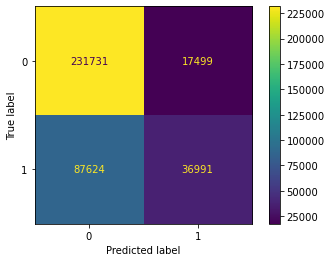

Accuracy: 0.7188059222405008
Precision: 0.6788585061479171
Recall: 0.29684227420455
F1 Score: 0.41306496189386116
Cohens Kappa Score: 0.2637328259423115
Area Under Curve: 0.7211007528030857
Confusion Matrix:
 [[231731  17499]
 [ 87624  36991]]

Testing:
--------
              precision    recall  f1-score   support

           0       0.71      0.91      0.80     27693
           1       0.59      0.25      0.36     13846

    accuracy                           0.69     41539
   macro avg       0.65      0.58      0.58     41539
weighted avg       0.67      0.69      0.65     41539



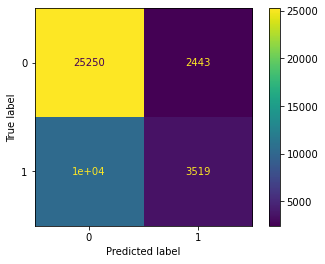

Accuracy: 0.6925780591733071
Precision: 0.5902381751090238
Recall: 0.2541528239202658
F1 Score: 0.35531098546042006
Cohens Kappa Score: 0.19347855824097926
Area Under Curve: 0.6791236270981457
Confusion Matrix:
 [[25250  2443]
 [10327  3519]]

Total:
------
              precision    recall  f1-score   support

           0       0.72      0.93      0.81    276923
           1       0.67      0.29      0.41    138461

    accuracy                           0.72    415384
   macro avg       0.70      0.61      0.61    415384
weighted avg       0.71      0.72      0.68    415384



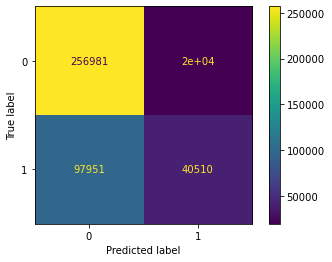

Accuracy: 0.7161830980490341
Precision: 0.6701184410772183
Recall: 0.29257336000751116
F1 Score: 0.40731375023251376
Cohens Kappa Score: 0.25671969557375973
Area Under Curve: 0.7169109482176826
Confusion Matrix:
 [[256981  19942]
 [ 97951  40510]]


[15:39:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643227205751/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Training:
---------
              precision    recall  f1-score   support

           0       0.72      0.93      0.81    249230
           1       0.68      0.29      0.40    124615

    accuracy                           0.72    373845
   macro avg       0.70      0.61      0.61    373845
weighted avg       0.71      0.72      0.68    373845



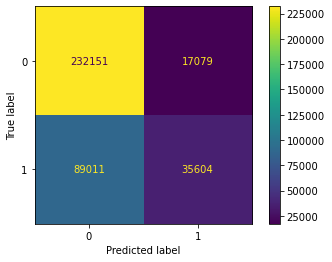

Accuracy: 0.7162192887426607
Precision: 0.675815728033711
Recall: 0.28571199293824984
F1 Score: 0.40162889598303425
Cohens Kappa Score: 0.25381217645734866
Area Under Curve: 0.718930105825328
Confusion Matrix:
 [[232151  17079]
 [ 89011  35604]]

Testing:
--------
              precision    recall  f1-score   support

           0       0.72      0.92      0.81     27693
           1       0.64      0.27      0.38     13846

    accuracy                           0.71     41539
   macro avg       0.68      0.60      0.59     41539
weighted avg       0.69      0.71      0.67     41539



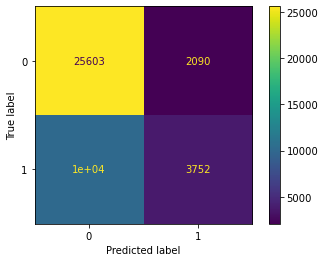

Accuracy: 0.7066852837092853
Precision: 0.6422458062307429
Recall: 0.27098078867542974
F1 Score: 0.3811458756603007
Cohens Kappa Score: 0.2285398268182256
Area Under Curve: 0.697867932653121
Confusion Matrix:
 [[25603  2090]
 [10094  3752]]

Total:
------
              precision    recall  f1-score   support

           0       0.72      0.93      0.81    276923
           1       0.67      0.28      0.40    138461

    accuracy                           0.72    415384
   macro avg       0.70      0.61      0.61    415384
weighted avg       0.71      0.72      0.68    415384



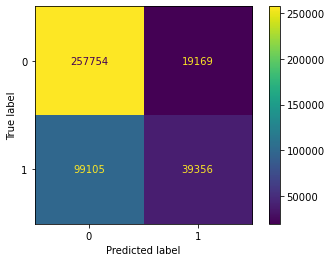

Accuracy: 0.7152658744679622
Precision: 0.6724647586501495
Recall: 0.28423888315121226
F1 Score: 0.3995816961611485
Cohens Kappa Score: 0.25128550473583844
Area Under Curve: 0.7168399814706762
Confusion Matrix:
 [[257754  19169]
 [ 99105  39356]]


[15:39:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643227205751/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Training:
---------
              precision    recall  f1-score   support

           0       0.72      0.93      0.81    249230
           1       0.68      0.29      0.40    124615

    accuracy                           0.72    373845
   macro avg       0.70      0.61      0.61    373845
weighted avg       0.71      0.72      0.68    373845



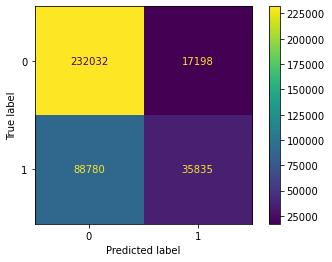

Accuracy: 0.7165188781446856
Precision: 0.6757113495370807
Recall: 0.2875657023632789
F1 Score: 0.40343825992974874
Cohens Kappa Score: 0.2552110907566095
Area Under Curve: 0.718681478511654
Confusion Matrix:
 [[232032  17198]
 [ 88780  35835]]

Testing:
--------
              precision    recall  f1-score   support

           0       0.72      0.92      0.81     27693
           1       0.63      0.27      0.38     13846

    accuracy                           0.70     41539
   macro avg       0.67      0.60      0.59     41539
weighted avg       0.69      0.70      0.66     41539



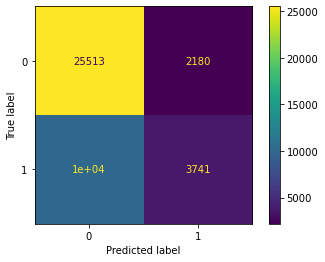

Accuracy: 0.7042538337465996
Precision: 0.6318189495017733
Recall: 0.2701863354037267
F1 Score: 0.37850963727424497
Cohens Kappa Score: 0.22343962963794461
Area Under Curve: 0.6981642705590039
Confusion Matrix:
 [[25513  2180]
 [10105  3741]]

Total:
------
              precision    recall  f1-score   support

           0       0.72      0.93      0.81    276923
           1       0.67      0.29      0.40    138461

    accuracy                           0.72    415384
   macro avg       0.70      0.61      0.61    415384
weighted avg       0.71      0.72      0.68    415384



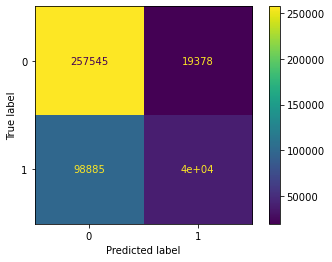

Accuracy: 0.7152923559886756
Precision: 0.671303049835465
Recall: 0.2858277782191375
F1 Score: 0.40094217764607554
Cohens Kappa Score: 0.25203223090946947
Area Under Curve: 0.7166330813414629
Confusion Matrix:
 [[257545  19378]
 [ 98885  39576]]


[15:39:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643227205751/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Training:
---------
              precision    recall  f1-score   support

           0       0.72      0.93      0.81    249231
           1       0.68      0.29      0.41    124615

    accuracy                           0.72    373846
   macro avg       0.70      0.61      0.61    373846
weighted avg       0.71      0.72      0.68    373846



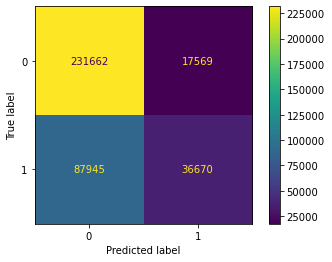

Accuracy: 0.7177607892019708
Precision: 0.676081786168624
Recall: 0.29426634032821086
F1 Score: 0.41005512876424344
Cohens Kappa Score: 0.2605615126028956
Area Under Curve: 0.7197763666703427
Confusion Matrix:
 [[231662  17569]
 [ 87945  36670]]

Testing:
--------
              precision    recall  f1-score   support

           0       0.72      0.92      0.81     27692
           1       0.63      0.28      0.39     13846

    accuracy                           0.71     41538
   macro avg       0.68      0.60      0.60     41538
weighted avg       0.69      0.71      0.67     41538



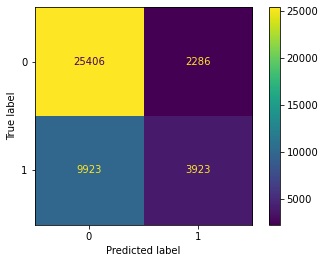

Accuracy: 0.7060763638114498
Precision: 0.6318247704944435
Recall: 0.28333092589917663
F1 Score: 0.3912241336325106
Cohens Kappa Score: 0.23289421324899995
Area Under Curve: 0.6910914002251172
Confusion Matrix:
 [[25406  2286]
 [ 9923  3923]]

Total:
------
              precision    recall  f1-score   support

           0       0.72      0.93      0.81    276923
           1       0.67      0.29      0.41    138461

    accuracy                           0.72    415384
   macro avg       0.70      0.61      0.61    415384
weighted avg       0.71      0.72      0.68    415384



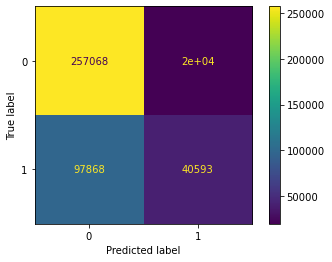

Accuracy: 0.7165923579146043
Precision: 0.6715358655373214
Recall: 0.2931728067831375
F1 Score: 0.4081564936729862
Cohens Kappa Score: 0.25778525572923483
Area Under Curve: 0.7169233117015273
Confusion Matrix:
 [[257068  19855]
 [ 97868  40593]]


[15:40:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643227205751/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Training:
---------
              precision    recall  f1-score   support

           0       0.72      0.93      0.81    249231
           1       0.67      0.29      0.40    124615

    accuracy                           0.72    373846
   macro avg       0.70      0.61      0.61    373846
weighted avg       0.71      0.72      0.68    373846



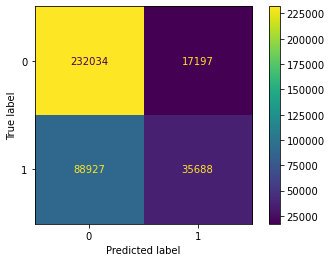

Accuracy: 0.716129101287696
Precision: 0.6748227285619741
Recall: 0.28638606909280584
F1 Score: 0.4021183098591549
Cohens Kappa Score: 0.253926864954384
Area Under Curve: 0.7168229008279888
Confusion Matrix:
 [[232034  17197]
 [ 88927  35688]]

Testing:
--------
              precision    recall  f1-score   support

           0       0.72      0.93      0.81     27692
           1       0.66      0.27      0.39     13846

    accuracy                           0.71     41538
   macro avg       0.69      0.60      0.60     41538
weighted avg       0.70      0.71      0.67     41538



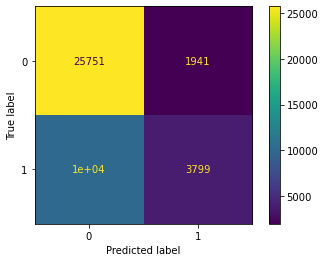

Accuracy: 0.7113967932977033
Precision: 0.6618466898954704
Recall: 0.2743752708363426
F1 Score: 0.38793015419176957
Cohens Kappa Score: 0.23930792334701123
Area Under Curve: 0.7128071126857995
Confusion Matrix:
 [[25751  1941]
 [10047  3799]]

Total:
------
              precision    recall  f1-score   support

           0       0.72      0.93      0.81    276923
           1       0.67      0.29      0.40    138461

    accuracy                           0.72    415384
   macro avg       0.70      0.61      0.61    415384
weighted avg       0.71      0.72      0.68    415384



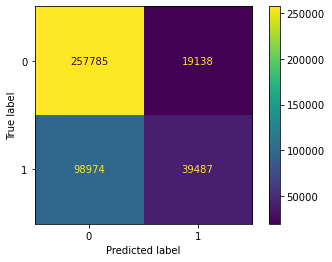

Accuracy: 0.7156558750457408
Precision: 0.6735522388059701
Recall: 0.28518499794165864
F1 Score: 0.40070832022568825
Cohens Kappa Score: 0.2524687579214884
Area Under Curve: 0.7164114135238657
Confusion Matrix:
 [[257785  19138]
 [ 98974  39487]]


[15:40:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643227205751/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Training:
---------
              precision    recall  f1-score   support

           0       0.72      0.93      0.81    249231
           1       0.68      0.29      0.40    124615

    accuracy                           0.72    373846
   macro avg       0.70      0.61      0.61    373846
weighted avg       0.71      0.72      0.68    373846



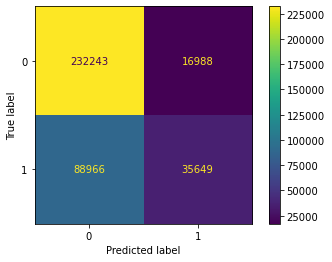

Accuracy: 0.7165838339851168
Precision: 0.6772612420920645
Recall: 0.28607310516390483
F1 Score: 0.4022408773948954
Cohens Kappa Score: 0.2546888494181686
Area Under Curve: 0.7169274463638348
Confusion Matrix:
 [[232243  16988]
 [ 88966  35649]]

Testing:
--------
              precision    recall  f1-score   support

           0       0.72      0.93      0.81     27692
           1       0.68      0.28      0.40     13846

    accuracy                           0.72     41538
   macro avg       0.70      0.61      0.60     41538
weighted avg       0.71      0.72      0.67     41538



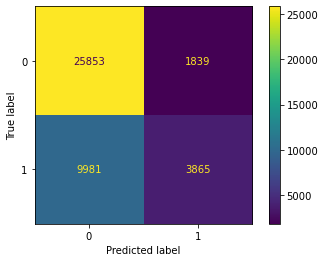

Accuracy: 0.7154412826809187
Precision: 0.6775946704067322
Recall: 0.27914199046656074
F1 Score: 0.39539641943734016
Cohens Kappa Score: 0.24939672325473095
Area Under Curve: 0.7184994721449366
Confusion Matrix:
 [[25853  1839]
 [ 9981  3865]]

Total:
------
              precision    recall  f1-score   support

           0       0.72      0.93      0.81    276923
           1       0.68      0.29      0.40    138461

    accuracy                           0.72    415384
   macro avg       0.70      0.61      0.61    415384
weighted avg       0.71      0.72      0.68    415384



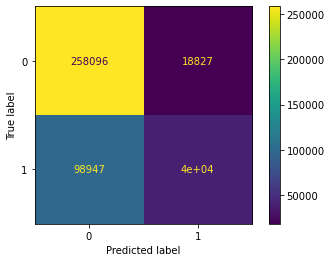

Accuracy: 0.7164695799549332
Precision: 0.6772938413808471
Recall: 0.2853799986999949
F1 Score: 0.401560959746344
Cohens Kappa Score: 0.2541610927613719
Area Under Curve: 0.7170769262868812
Confusion Matrix:
 [[258096  18827]
 [ 98947  39514]]


[15:40:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643227205751/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Training:
---------
              precision    recall  f1-score   support

           0       0.72      0.93      0.81    249231
           1       0.68      0.29      0.41    124615

    accuracy                           0.72    373846
   macro avg       0.70      0.61      0.61    373846
weighted avg       0.71      0.72      0.68    373846



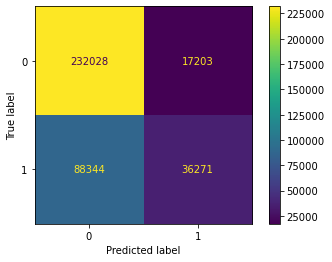

Accuracy: 0.7176725175607068
Precision: 0.6782922541796013
Recall: 0.29106447859406975
F1 Score: 0.4073356580136898
Cohens Kappa Score: 0.2590060633387503
Area Under Curve: 0.7191067420532772
Confusion Matrix:
 [[232028  17203]
 [ 88344  36271]]

Testing:
--------
              precision    recall  f1-score   support

           0       0.72      0.91      0.80     27692
           1       0.61      0.28      0.38     13846

    accuracy                           0.70     41538
   macro avg       0.66      0.60      0.59     41538
weighted avg       0.68      0.70      0.66     41538



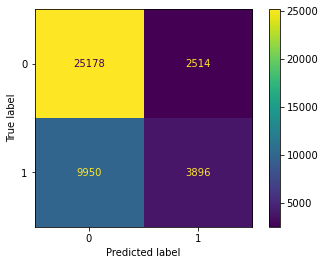

Accuracy: 0.6999374067119264
Precision: 0.6078003120124805
Recall: 0.28138090423226925
F1 Score: 0.38467614533965244
Cohens Kappa Score: 0.22015516809877378
Area Under Curve: 0.6884304634777773
Confusion Matrix:
 [[25178  2514]
 [ 9950  3896]]

Total:
------
              precision    recall  f1-score   support

           0       0.72      0.93      0.81    276923
           1       0.67      0.29      0.41    138461

    accuracy                           0.72    415384
   macro avg       0.70      0.61      0.61    415384
weighted avg       0.71      0.72      0.68    415384



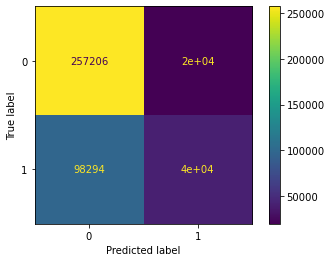

Accuracy: 0.715899023554109
Precision: 0.6707467771023979
Recall: 0.29009612815160946
F1 Score: 0.40502155335400436
Cohens Kappa Score: 0.25508654036887024
Area Under Curve: 0.7160637457055743
Confusion Matrix:
 [[257206  19717]
 [ 98294  40167]]


[15:40:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643227205751/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Training:
---------
              precision    recall  f1-score   support

           0       0.72      0.93      0.81    249231
           1       0.68      0.29      0.41    124615

    accuracy                           0.72    373846
   macro avg       0.70      0.61      0.61    373846
weighted avg       0.71      0.72      0.68    373846



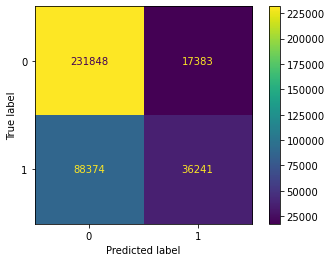

Accuracy: 0.717110788934481
Precision: 0.675835446814859
Recall: 0.29082373711029974
F1 Score: 0.40665623124007655
Cohens Kappa Score: 0.2577922911899584
Area Under Curve: 0.7208584465503727
Confusion Matrix:
 [[231848  17383]
 [ 88374  36241]]

Testing:
--------
              precision    recall  f1-score   support

           0       0.72      0.92      0.81     27692
           1       0.64      0.29      0.39     13846

    accuracy                           0.71     41538
   macro avg       0.68      0.60      0.60     41538
weighted avg       0.69      0.71      0.67     41538



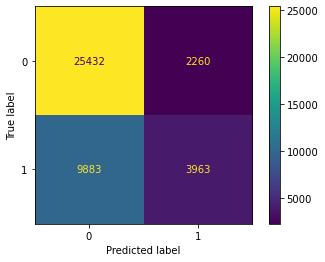

Accuracy: 0.7076652703548558
Precision: 0.6368311103969146
Recall: 0.28621984688718766
F1 Score: 0.394937465743186
Cohens Kappa Score: 0.23726471388790016
Area Under Curve: 0.6986037293098978
Confusion Matrix:
 [[25432  2260]
 [ 9883  3963]]

Total:
------
              precision    recall  f1-score   support

           0       0.72      0.93      0.81    276923
           1       0.67      0.29      0.41    138461

    accuracy                           0.72    415384
   macro avg       0.70      0.61      0.61    415384
weighted avg       0.71      0.72      0.68    415384



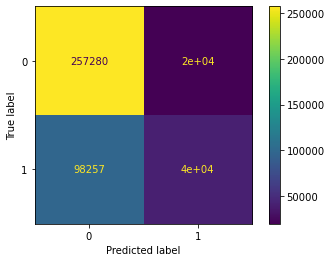

Accuracy: 0.7161662461722166
Precision: 0.6717797049141979
Recall: 0.29036335141303327
F1 Score: 0.4054702785565888
Cohens Kappa Score: 0.2557292562834552
Area Under Curve: 0.7186415357449745
Confusion Matrix:
 [[257280  19643]
 [ 98257  40204]]


[15:40:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643227205751/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Training:
---------
              precision    recall  f1-score   support

           0       0.73      0.93      0.82    249231
           1       0.68      0.30      0.41    124615

    accuracy                           0.72    373846
   macro avg       0.70      0.61      0.61    373846
weighted avg       0.71      0.72      0.68    373846



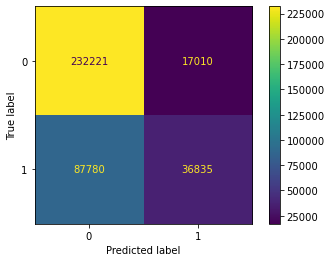

Accuracy: 0.7196974155133398
Precision: 0.6840932305692264
Recall: 0.29559041848894596
F1 Score: 0.4128095931861482
Cohens Kappa Score: 0.26495875923174483
Area Under Curve: 0.7212531500134391
Confusion Matrix:
 [[232221  17010]
 [ 87780  36835]]

Testing:
--------
              precision    recall  f1-score   support

           0       0.72      0.91      0.80     27692
           1       0.61      0.28      0.38     13846

    accuracy                           0.70     41538
   macro avg       0.66      0.59      0.59     41538
weighted avg       0.68      0.70      0.66     41538



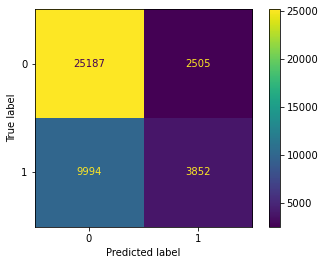

Accuracy: 0.6990948047570898
Precision: 0.6059462010382256
Recall: 0.27820309114545716
F1 Score: 0.3813295055189823
Cohens Kappa Score: 0.21709990604447227
Area Under Curve: 0.6922504464985333
Confusion Matrix:
 [[25187  2505]
 [ 9994  3852]]

Total:
------
              precision    recall  f1-score   support

           0       0.72      0.93      0.81    276923
           1       0.68      0.29      0.41    138461

    accuracy                           0.72    415384
   macro avg       0.70      0.61      0.61    415384
weighted avg       0.71      0.72      0.68    415384



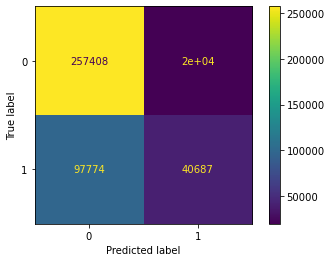

Accuracy: 0.7176371742772952
Precision: 0.6758413341749444
Recall: 0.2938516983121601
F1 Score: 0.4096082310243982
Cohens Kappa Score: 0.2601390171210579
Area Under Curve: 0.7183680964394406
Confusion Matrix:
 [[257408  19515]
 [ 97774  40687]]




In [22]:
X = df.drop(['Asthma', 'KidneyDisease', 'SkinCancer'], axis=1)
y_asthma = df['Asthma'].map({
    'Yes': 1,
    'No' : 0
})
y_kidneydisease = df['KidneyDisease'].map({
    'Yes': 1,
    'No' : 0
})
y_skincancer = df['SkinCancer'].map({
    'Yes': 1,
    'No' : 0
})

print("The number of classes before fit {}".format(Counter(y_asthma)))
os = RandomOverSampler(0.5)
X, y_asthma = os.fit_resample(X, y_asthma)
print("The number of classes after fit {}\n\n".format(Counter(y_asthma)))

skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X, y_asthma)

clf_asthma = XGBClassifier()

for train_idx, test_idx in skf.split(X, y_asthma):
    X_train = X.iloc[train_idx]
    y_train = y_asthma.iloc[train_idx]    
    X_test = X.iloc[test_idx]
    y_test = y_asthma.iloc[test_idx]
    clf_asthma.fit(X_train, y_train)
    pred_test = clf_asthma.predict(X_test)
    pred_train = clf_asthma.predict(X_train)
    pred = clf_asthma.predict(X)
    print(f'\nTraining:')
    print(f'---------')
    print(classification_report(y_train, pred_train))
    plot_confusion_matrix(clf_asthma, X_train, y_train)
    plt.show()
    eval = evaluate_model(clf_asthma, X_train, y_train)
    # Print result
    print('Accuracy:', eval['acc'])
    print('Precision:', eval['prec'])
    print('Recall:', eval['rec'])
    print('F1 Score:', eval['f1'])
    print('Cohens Kappa Score:', eval['kappa'])
    print('Area Under Curve:', eval['auc'])
    print('Confusion Matrix:\n', eval['cm'])
    
    print(f'\nTesting:')
    print(f'--------')
    print(classification_report(y_test, pred_test))
    plot_confusion_matrix(clf_asthma, X_test, y_test)
    plt.show()
    eval = evaluate_model(clf_asthma, X_test, y_test)
    # Print result
    print('Accuracy:', eval['acc'])
    print('Precision:', eval['prec'])
    print('Recall:', eval['rec'])
    print('F1 Score:', eval['f1'])
    print('Cohens Kappa Score:', eval['kappa'])
    print('Area Under Curve:', eval['auc'])
    print('Confusion Matrix:\n', eval['cm'])
    
    print(f'\nTotal:')
    print(f'------')
    print(classification_report(y_asthma, pred))
    plot_confusion_matrix(clf_asthma, X, y_asthma)
    plt.show()
    eval = evaluate_model(clf_asthma, X, y_asthma)
    # Print result
    print('Accuracy:', eval['acc'])
    print('Precision:', eval['prec'])
    print('Recall:', eval['rec'])
    print('F1 Score:', eval['f1'])
    print('Cohens Kappa Score:', eval['kappa'])
    print('Area Under Curve:', eval['auc'])
    print('Confusion Matrix:\n', eval['cm'])
    print(f'\n================================================\n')

### Kidney Disease

The number of classes before fit Counter({0: 308016, 1: 11779})
The number of classes after fit Counter({0: 308016, 1: 154008})


[15:41:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643227205751/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Training:
---------
              precision    recall  f1-score   support

           0       0.82      0.89      0.85    277214
           1       0.73      0.62      0.67    138607

    accuracy                           0.80    415821
   macro avg       0.78      0.75      0.76    415821
weighted avg       0.79      0.80      0.79    415821



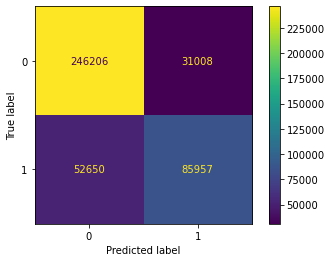

Accuracy: 0.7988124697886831
Precision: 0.7348950540760056
Recall: 0.620149054521056
F1 Score: 0.6726636720767534
Cohens Kappa Score: 0.52894032500854
Area Under Curve: 0.8663006204634117
Confusion Matrix:
 [[246206  31008]
 [ 52650  85957]]

Testing:
--------
              precision    recall  f1-score   support

           0       0.82      0.88      0.85     30802
           1       0.72      0.61      0.66     15401

    accuracy                           0.79     46203
   macro avg       0.77      0.75      0.75     46203
weighted avg       0.79      0.79      0.79     46203



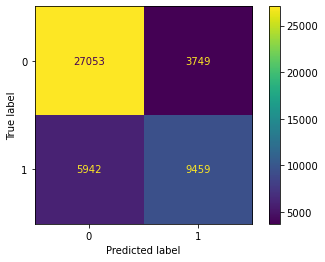

Accuracy: 0.7902517152565851
Precision: 0.7161568746214415
Recall: 0.6141808973443282
F1 Score: 0.6612604425180887
Cohens Kappa Score: 0.5106461766339567
Area Under Curve: 0.8575336844534708
Confusion Matrix:
 [[27053  3749]
 [ 5942  9459]]

Total:
------
              precision    recall  f1-score   support

           0       0.82      0.89      0.85    308016
           1       0.73      0.62      0.67    154008

    accuracy                           0.80    462024
   macro avg       0.78      0.75      0.76    462024
weighted avg       0.79      0.80      0.79    462024



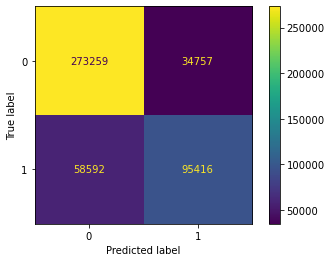

Accuracy: 0.7979563832181878
Precision: 0.7329937851935501
Recall: 0.6195522310529323
F1 Score: 0.6715156889447219
Cohens Kappa Score: 0.5271050005319176
Area Under Curve: 0.8654264246775301
Confusion Matrix:
 [[273259  34757]
 [ 58592  95416]]


[15:41:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643227205751/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Training:
---------
              precision    recall  f1-score   support

           0       0.82      0.89      0.85    277214
           1       0.73      0.62      0.67    138607

    accuracy                           0.80    415821
   macro avg       0.78      0.75      0.76    415821
weighted avg       0.79      0.80      0.79    415821



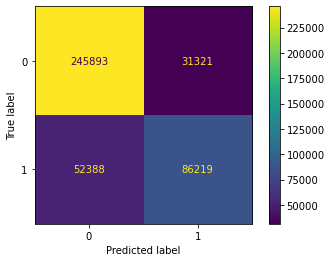

Accuracy: 0.7986898208604183
Precision: 0.7335290114003743
Recall: 0.6220392909449017
F1 Score: 0.6731993737970774
Cohens Kappa Score: 0.5291612997575751
Area Under Curve: 0.8648764759951104
Confusion Matrix:
 [[245893  31321]
 [ 52388  86219]]

Testing:
--------
              precision    recall  f1-score   support

           0       0.82      0.87      0.84     30802
           1       0.70      0.61      0.65     15401

    accuracy                           0.78     46203
   macro avg       0.76      0.74      0.75     46203
weighted avg       0.78      0.78      0.78     46203



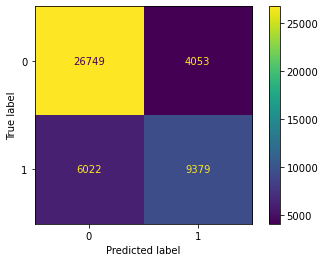

Accuracy: 0.7819405666298725
Precision: 0.6982578916021441
Recall: 0.6089864294526329
F1 Score: 0.6505739950750875
Cohens Kappa Score: 0.4931667644839439
Area Under Curve: 0.8452292717709571
Confusion Matrix:
 [[26749  4053]
 [ 6022  9379]]

Total:
------
              precision    recall  f1-score   support

           0       0.82      0.89      0.85    308016
           1       0.73      0.62      0.67    154008

    accuracy                           0.80    462024
   macro avg       0.78      0.75      0.76    462024
weighted avg       0.79      0.80      0.79    462024



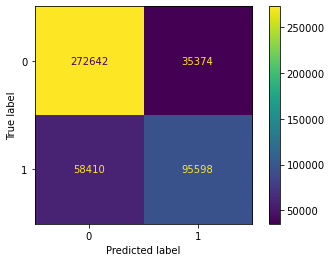

Accuracy: 0.7970148736862155
Precision: 0.7299117368597868
Recall: 0.6207339878447873
F1 Score: 0.6709102393150396
Cohens Kappa Score: 0.5255414876322944
Area Under Curve: 0.862934254143616
Confusion Matrix:
 [[272642  35374]
 [ 58410  95598]]


[15:41:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643227205751/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Training:
---------
              precision    recall  f1-score   support

           0       0.82      0.89      0.85    277214
           1       0.73      0.62      0.67    138607

    accuracy                           0.80    415821
   macro avg       0.78      0.75      0.76    415821
weighted avg       0.79      0.80      0.79    415821



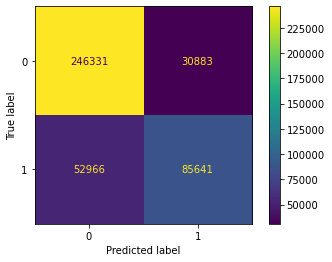

Accuracy: 0.7983531375279267
Precision: 0.7349644708386255
Recall: 0.6178692273838984
F1 Score: 0.6713492284355881
Cohens Kappa Score: 0.5274737247461703
Area Under Curve: 0.8639417720314048
Confusion Matrix:
 [[246331  30883]
 [ 52966  85641]]

Testing:
--------
              precision    recall  f1-score   support

           0       0.82      0.89      0.85     30802
           1       0.74      0.61      0.67     15401

    accuracy                           0.80     46203
   macro avg       0.78      0.75      0.76     46203
weighted avg       0.79      0.80      0.79     46203



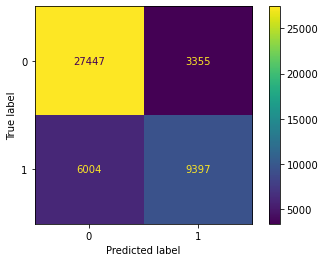

Accuracy: 0.797437395840097
Precision: 0.7369040150564617
Recall: 0.6101551847282644
F1 Score: 0.6675665115618229
Cohens Kappa Score: 0.5237554066661013
Area Under Curve: 0.8636139244708736
Confusion Matrix:
 [[27447  3355]
 [ 6004  9397]]

Total:
------
              precision    recall  f1-score   support

           0       0.82      0.89      0.85    308016
           1       0.74      0.62      0.67    154008

    accuracy                           0.80    462024
   macro avg       0.78      0.75      0.76    462024
weighted avg       0.79      0.80      0.79    462024



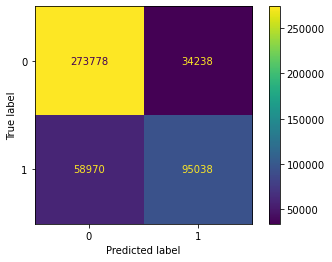

Accuracy: 0.7982615621699306
Precision: 0.7351557907113463
Recall: 0.6170978131006182
F1 Score: 0.6709732988802756
Cohens Kappa Score: 0.5271029934043633
Area Under Curve: 0.8639039298754821
Confusion Matrix:
 [[273778  34238]
 [ 58970  95038]]


[15:41:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643227205751/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Training:
---------
              precision    recall  f1-score   support

           0       0.82      0.89      0.85    277214
           1       0.73      0.62      0.67    138607

    accuracy                           0.80    415821
   macro avg       0.78      0.75      0.76    415821
weighted avg       0.79      0.80      0.79    415821



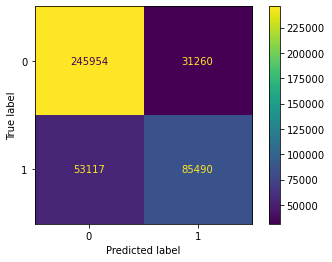

Accuracy: 0.797083360388244
Precision: 0.7322483940042827
Recall: 0.6167798163151933
F1 Score: 0.6695724025579874
Cohens Kappa Score: 0.5246999930525695
Area Under Curve: 0.8641998167658733
Confusion Matrix:
 [[245954  31260]
 [ 53117  85490]]

Testing:
--------
              precision    recall  f1-score   support

           0       0.82      0.88      0.85     30802
           1       0.72      0.61      0.66     15401

    accuracy                           0.79     46203
   macro avg       0.77      0.74      0.75     46203
weighted avg       0.79      0.79      0.79     46203



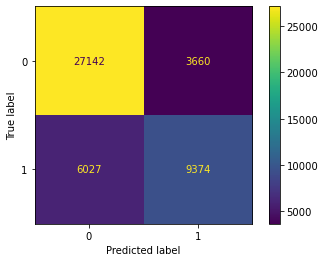

Accuracy: 0.7903382897214467
Precision: 0.7191959490563142
Recall: 0.608661775209402
F1 Score: 0.6593282925971515
Cohens Kappa Score: 0.5094113476374563
Area Under Curve: 0.855545164038634
Confusion Matrix:
 [[27142  3660]
 [ 6027  9374]]

Total:
------
              precision    recall  f1-score   support

           0       0.82      0.89      0.85    308016
           1       0.73      0.62      0.67    154008

    accuracy                           0.80    462024
   macro avg       0.78      0.75      0.76    462024
weighted avg       0.79      0.80      0.79    462024



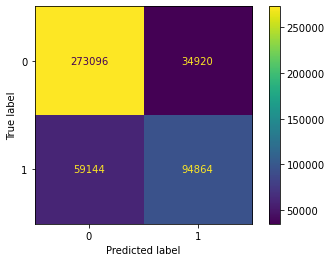

Accuracy: 0.7964088445621872
Precision: 0.7309375577883253
Recall: 0.6159680016622513
F1 Score: 0.6685459773355134
Cohens Kappa Score: 0.5231696766518872
Area Under Curve: 0.8633390283829636
Confusion Matrix:
 [[273096  34920]
 [ 59144  94864]]


[15:42:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643227205751/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Training:
---------
              precision    recall  f1-score   support

           0       0.82      0.89      0.85    277214
           1       0.73      0.62      0.67    138608

    accuracy                           0.80    415822
   macro avg       0.78      0.75      0.76    415822
weighted avg       0.79      0.80      0.79    415822



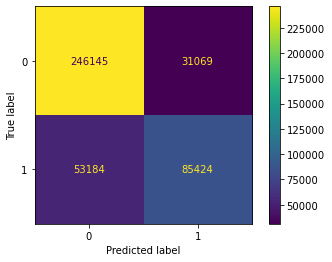

Accuracy: 0.7973820528976341
Precision: 0.7332972796648726
Recall: 0.616299203509177
F1 Score: 0.6697268924857213
Cohens Kappa Score: 0.5251710313676363
Area Under Curve: 0.8654594964794871
Confusion Matrix:
 [[246145  31069]
 [ 53184  85424]]

Testing:
--------
              precision    recall  f1-score   support

           0       0.82      0.88      0.85     30802
           1       0.72      0.61      0.66     15400

    accuracy                           0.79     46202
   macro avg       0.77      0.75      0.75     46202
weighted avg       0.78      0.79      0.79     46202



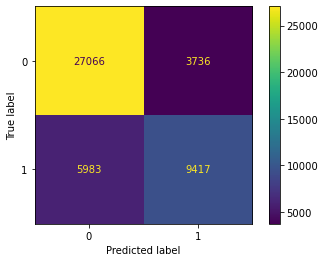

Accuracy: 0.7896411410761439
Precision: 0.7159583365011785
Recall: 0.6114935064935065
F1 Score: 0.6596154519665184
Cohens Kappa Score: 0.5087621416188338
Area Under Curve: 0.8569351954292057
Confusion Matrix:
 [[27066  3736]
 [ 5983  9417]]

Total:
------
              precision    recall  f1-score   support

           0       0.82      0.89      0.85    308016
           1       0.73      0.62      0.67    154008

    accuracy                           0.80    462024
   macro avg       0.78      0.75      0.76    462024
weighted avg       0.79      0.80      0.79    462024



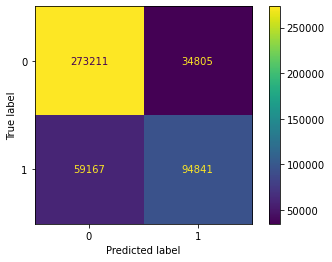

Accuracy: 0.796607968417225
Precision: 0.731538188605896
Recall: 0.615818658770973
F1 Score: 0.6687090610391533
Cohens Kappa Score: 0.5235249378876738
Area Under Curve: 0.8646068544601018
Confusion Matrix:
 [[273211  34805]
 [ 59167  94841]]


[15:42:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643227205751/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Training:
---------
              precision    recall  f1-score   support

           0       0.82      0.89      0.85    277214
           1       0.73      0.62      0.67    138608

    accuracy                           0.80    415822
   macro avg       0.78      0.75      0.76    415822
weighted avg       0.79      0.80      0.79    415822



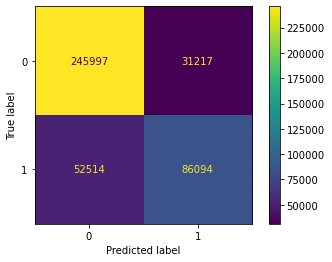

Accuracy: 0.7986373977326837
Precision: 0.7338953721304907
Recall: 0.621132979337412
F1 Score: 0.6728222601682563
Cohens Kappa Score: 0.5288369142995033
Area Under Curve: 0.866461038335295
Confusion Matrix:
 [[245997  31217]
 [ 52514  86094]]

Testing:
--------
              precision    recall  f1-score   support

           0       0.82      0.89      0.85     30802
           1       0.74      0.61      0.67     15400

    accuracy                           0.80     46202
   macro avg       0.78      0.75      0.76     46202
weighted avg       0.79      0.80      0.79     46202



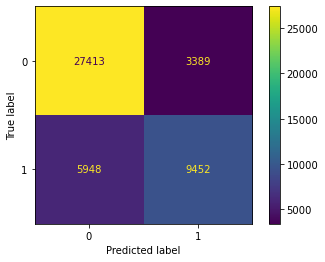

Accuracy: 0.7979091814207178
Precision: 0.73607974456818
Recall: 0.6137662337662337
F1 Score: 0.6693813958429234
Cohens Kappa Score: 0.5255759121619967
Area Under Curve: 0.8606450711161444
Confusion Matrix:
 [[27413  3389]
 [ 5948  9452]]

Total:
------
              precision    recall  f1-score   support

           0       0.82      0.89      0.85    308016
           1       0.73      0.62      0.67    154008

    accuracy                           0.80    462024
   macro avg       0.78      0.75      0.76    462024
weighted avg       0.79      0.80      0.79    462024



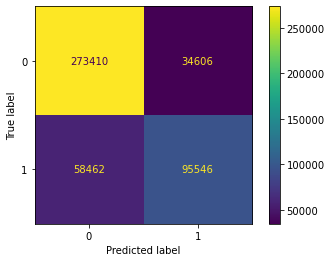

Accuracy: 0.7985645767319447
Precision: 0.7341108857336038
Recall: 0.6203963430471144
F1 Score: 0.6724802927927928
Cohens Kappa Score: 0.5285117937910351
Area Under Curve: 0.8658846196293902
Confusion Matrix:
 [[273410  34606]
 [ 58462  95546]]


[15:42:33] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643227205751/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Training:
---------
              precision    recall  f1-score   support

           0       0.82      0.89      0.85    277215
           1       0.74      0.62      0.67    138607

    accuracy                           0.80    415822
   macro avg       0.78      0.75      0.76    415822
weighted avg       0.79      0.80      0.79    415822



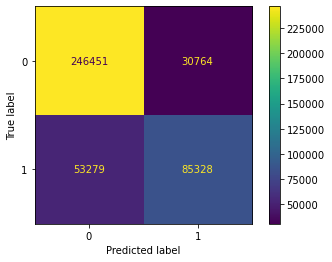

Accuracy: 0.7978870766818494
Precision: 0.7350032732660304
Recall: 0.6156110441752581
F1 Score: 0.6700301139776756
Cohens Kappa Score: 0.5259962901285116
Area Under Curve: 0.8639645425524413
Confusion Matrix:
 [[246451  30764]
 [ 53279  85328]]

Testing:
--------
              precision    recall  f1-score   support

           0       0.82      0.88      0.85     30801
           1       0.72      0.62      0.66     15401

    accuracy                           0.79     46202
   macro avg       0.77      0.75      0.76     46202
weighted avg       0.79      0.79      0.79     46202



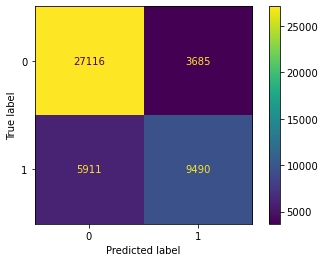

Accuracy: 0.792303363490758
Precision: 0.720303605313093
Recall: 0.6161937536523603
F1 Score: 0.6641937290033594
Cohens Kappa Score: 0.5151693133916939
Area Under Curve: 0.8548280340065796
Confusion Matrix:
 [[27116  3685]
 [ 5911  9490]]

Total:
------
              precision    recall  f1-score   support

           0       0.82      0.89      0.85    308016
           1       0.73      0.62      0.67    154008

    accuracy                           0.80    462024
   macro avg       0.78      0.75      0.76    462024
weighted avg       0.79      0.80      0.79    462024



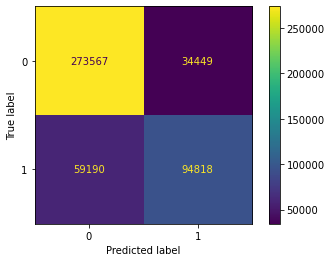

Accuracy: 0.7973287101968729
Precision: 0.7335050708997656
Recall: 0.6156693158796945
F1 Score: 0.6694413555732063
Cohens Kappa Score: 0.524909054932343
Area Under Curve: 0.8630532209638276
Confusion Matrix:
 [[273567  34449]
 [ 59190  94818]]


[15:42:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643227205751/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Training:
---------
              precision    recall  f1-score   support

           0       0.82      0.89      0.85    277215
           1       0.74      0.62      0.67    138607

    accuracy                           0.80    415822
   macro avg       0.78      0.75      0.76    415822
weighted avg       0.79      0.80      0.79    415822



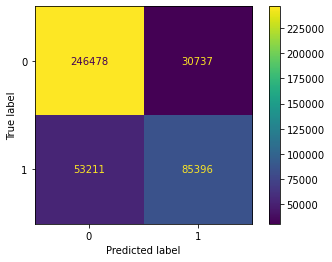

Accuracy: 0.7981155398223279
Precision: 0.7353293206926541
Recall: 0.6161016398883173
F1 Score: 0.6704561513700243
Cohens Kappa Score: 0.5265685838341922
Area Under Curve: 0.8659111001273162
Confusion Matrix:
 [[246478  30737]
 [ 53211  85396]]

Testing:
--------
              precision    recall  f1-score   support

           0       0.82      0.89      0.85     30801
           1       0.73      0.61      0.66     15401

    accuracy                           0.79     46202
   macro avg       0.77      0.75      0.76     46202
weighted avg       0.79      0.79      0.79     46202



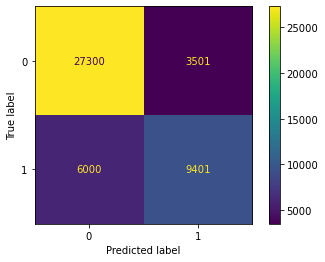

Accuracy: 0.7943595515345656
Precision: 0.7286467214385367
Recall: 0.6104149081228492
F1 Score: 0.6643112037593188
Cohens Kappa Score: 0.5177519780487203
Area Under Curve: 0.8638605609677491
Confusion Matrix:
 [[27300  3501]
 [ 6000  9401]]

Total:
------
              precision    recall  f1-score   support

           0       0.82      0.89      0.85    308016
           1       0.73      0.62      0.67    154008

    accuracy                           0.80    462024
   macro avg       0.78      0.75      0.76    462024
weighted avg       0.79      0.80      0.79    462024



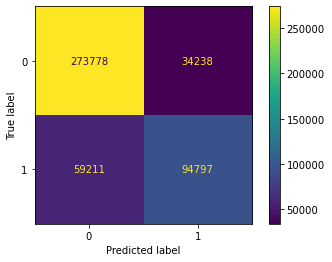

Accuracy: 0.7977399442453206
Precision: 0.7346611384508079
Recall: 0.6155329593267882
F1 Score: 0.66984168483234
Cohens Kappa Score: 0.5256869449581175
Area Under Curve: 0.8657091282278908
Confusion Matrix:
 [[273778  34238]
 [ 59211  94797]]


[15:43:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643227205751/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Training:
---------
              precision    recall  f1-score   support

           0       0.82      0.89      0.85    277215
           1       0.73      0.62      0.67    138607

    accuracy                           0.80    415822
   macro avg       0.78      0.75      0.76    415822
weighted avg       0.79      0.80      0.79    415822



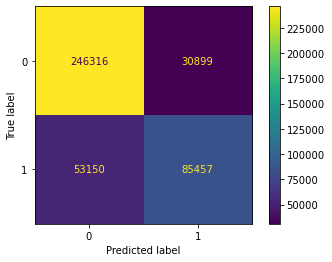

Accuracy: 0.7978726474308718
Precision: 0.7344442916566399
Recall: 0.6165417331015028
F1 Score: 0.6703482466083314
Cohens Kappa Score: 0.526197609367443
Area Under Curve: 0.8642505055260861
Confusion Matrix:
 [[246316  30899]
 [ 53150  85457]]

Testing:
--------
              precision    recall  f1-score   support

           0       0.82      0.88      0.85     30801
           1       0.72      0.61      0.66     15401

    accuracy                           0.79     46202
   macro avg       0.77      0.74      0.75     46202
weighted avg       0.78      0.79      0.78     46202



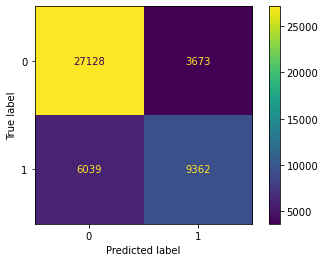

Accuracy: 0.7897926496688455
Precision: 0.7182201764480245
Recall: 0.6078826050256477
F1 Score: 0.6584611056407372
Cohens Kappa Score: 0.5081488650434751
Area Under Curve: 0.8596671804195426
Confusion Matrix:
 [[27128  3673]
 [ 6039  9362]]

Total:
------
              precision    recall  f1-score   support

           0       0.82      0.89      0.85    308016
           1       0.73      0.62      0.67    154008

    accuracy                           0.80    462024
   macro avg       0.78      0.75      0.76    462024
weighted avg       0.79      0.80      0.79    462024



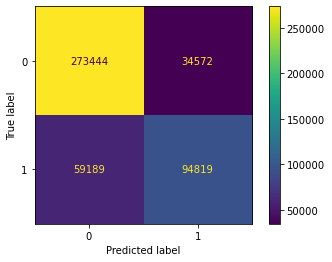

Accuracy: 0.7970646546499749
Precision: 0.7328098553995255
Recall: 0.6156758090488805
F1 Score: 0.6691555016072745
Cohens Kappa Score: 0.5243898108773027
Area Under Curve: 0.8637880756830444
Confusion Matrix:
 [[273444  34572]
 [ 59189  94819]]


[15:43:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643227205751/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Training:
---------
              precision    recall  f1-score   support

           0       0.82      0.89      0.85    277215
           1       0.73      0.62      0.67    138607

    accuracy                           0.80    415822
   macro avg       0.78      0.75      0.76    415822
weighted avg       0.79      0.80      0.79    415822



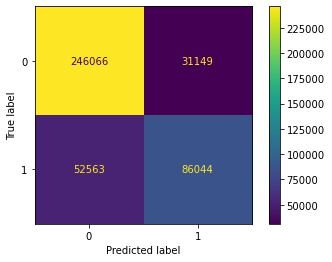

Accuracy: 0.7986830903607793
Precision: 0.7342076745198092
Recall: 0.6207767284480582
F1 Score: 0.6727443315089914
Cohens Kappa Score: 0.5288383899470305
Area Under Curve: 0.8649805965933061
Confusion Matrix:
 [[246066  31149]
 [ 52563  86044]]

Testing:
--------
              precision    recall  f1-score   support

           0       0.82      0.87      0.85     30801
           1       0.71      0.62      0.66     15401

    accuracy                           0.79     46202
   macro avg       0.77      0.75      0.75     46202
weighted avg       0.78      0.79      0.78     46202



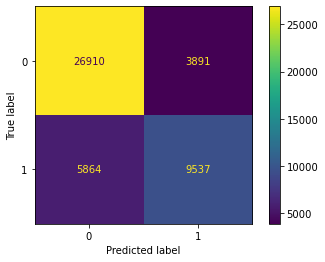

Accuracy: 0.7888619540279641
Precision: 0.7102323503127793
Recall: 0.6192455035387312
F1 Score: 0.6616254465989108
Cohens Kappa Score: 0.5092269914413139
Area Under Curve: 0.8525168438381217
Confusion Matrix:
 [[26910  3891]
 [ 5864  9537]]

Total:
------
              precision    recall  f1-score   support

           0       0.82      0.89      0.85    308016
           1       0.73      0.62      0.67    154008

    accuracy                           0.80    462024
   macro avg       0.78      0.75      0.76    462024
weighted avg       0.79      0.80      0.79    462024



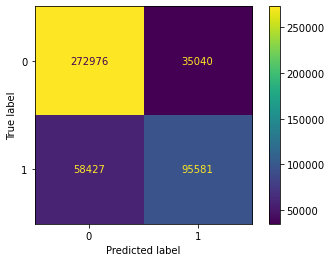

Accuracy: 0.7977009852302045
Precision: 0.7317429816032645
Recall: 0.620623603968625
F1 Score: 0.6716181415105277
Cohens Kappa Score: 0.5268651553628226
Area Under Curve: 0.8637356356938173
Confusion Matrix:
 [[272976  35040]
 [ 58427  95581]]




In [23]:
X = df.drop(['Asthma', 'KidneyDisease', 'SkinCancer'], axis=1)
y_asthma = df['Asthma'].map({
    'Yes': 1,
    'No' : 0
})
y_kidneydisease = df['KidneyDisease'].map({
    'Yes': 1,
    'No' : 0
})
y_skincancer = df['SkinCancer'].map({
    'Yes': 1,
    'No' : 0
})

print("The number of classes before fit {}".format(Counter(y_kidneydisease)))
os = RandomOverSampler(0.5)
X, y_kidneydisease = os.fit_resample(X, y_kidneydisease)
print("The number of classes after fit {}\n\n".format(Counter(y_kidneydisease)))

skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X, y_kidneydisease)

clf_kidney = XGBClassifier()

for train_idx, test_idx in skf.split(X, y_kidneydisease):
    X_train = X.iloc[train_idx]
    y_train = y_kidneydisease.iloc[train_idx]    
    X_test = X.iloc[test_idx]
    y_test = y_kidneydisease.iloc[test_idx]
    clf_kidney.fit(X_train, y_train)
    pred_test = clf_kidney.predict(X_test)
    pred_train = clf_kidney.predict(X_train)
    pred = clf_kidney.predict(X)
    print(f'\nTraining:')
    print(f'---------')
    print(classification_report(y_train, pred_train))
    plot_confusion_matrix(clf_kidney, X_train, y_train)
    plt.show()
    eval = evaluate_model(clf_kidney, X_train, y_train)
    # Print result
    print('Accuracy:', eval['acc'])
    print('Precision:', eval['prec'])
    print('Recall:', eval['rec'])
    print('F1 Score:', eval['f1'])
    print('Cohens Kappa Score:', eval['kappa'])
    print('Area Under Curve:', eval['auc'])
    print('Confusion Matrix:\n', eval['cm'])
    
    print(f'\nTesting:')
    print(f'--------')
    print(classification_report(y_test, pred_test))
    plot_confusion_matrix(clf_kidney, X_test, y_test)
    plt.show()
    eval = evaluate_model(clf_kidney, X_test, y_test)
    # Print result
    print('Accuracy:', eval['acc'])
    print('Precision:', eval['prec'])
    print('Recall:', eval['rec'])
    print('F1 Score:', eval['f1'])
    print('Cohens Kappa Score:', eval['kappa'])
    print('Area Under Curve:', eval['auc'])
    print('Confusion Matrix:\n', eval['cm'])
    
    print(f'\nTotal:')
    print(f'------')
    print(classification_report(y_kidneydisease, pred))
    plot_confusion_matrix(clf_kidney, X, y_kidneydisease)
    plt.show()
    eval = evaluate_model(clf_kidney, X, y_kidneydisease)
    # Print result
    print('Accuracy:', eval['acc'])
    print('Precision:', eval['prec'])
    print('Recall:', eval['rec'])
    print('F1 Score:', eval['f1'])
    print('Cohens Kappa Score:', eval['kappa'])
    print('Area Under Curve:', eval['auc'])
    print('Confusion Matrix:\n', eval['cm'])
    print(f'\n================================================\n')

### Skin Cancer

The number of classes before fit Counter({0: 289976, 1: 29819})
The number of classes after fit Counter({0: 289976, 1: 144988})


[15:44:06] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643227205751/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Training:
---------
              precision    recall  f1-score   support

           0       0.80      0.84      0.82    260978
           1       0.64      0.59      0.61    130489

    accuracy                           0.75    391467
   macro avg       0.72      0.71      0.72    391467
weighted avg       0.75      0.75      0.75    391467



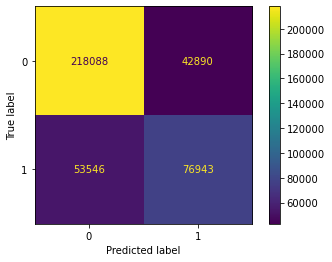

Accuracy: 0.7536548419151551
Precision: 0.6420852352857727
Recall: 0.5896512349699975
F1 Score: 0.6147521991674724
Cohens Kappa Score: 0.4341717191472717
Area Under Curve: 0.8298705439830559
Confusion Matrix:
 [[218088  42890]
 [ 53546  76943]]

Testing:
--------
              precision    recall  f1-score   support

           0       0.80      0.83      0.82     28998
           1       0.64      0.58      0.61     14499

    accuracy                           0.75     43497
   macro avg       0.72      0.71      0.71     43497
weighted avg       0.75      0.75      0.75     43497



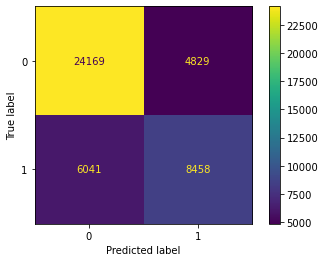

Accuracy: 0.7500977078879003
Precision: 0.6365620531346429
Recall: 0.5833505759017863
F1 Score: 0.6087957964442525
Cohens Kappa Score: 0.42571851225697377
Area Under Curve: 0.8272705791653994
Confusion Matrix:
 [[24169  4829]
 [ 6041  8458]]

Total:
------
              precision    recall  f1-score   support

           0       0.80      0.84      0.82    289976
           1       0.64      0.59      0.61    144988

    accuracy                           0.75    434964
   macro avg       0.72      0.71      0.72    434964
weighted avg       0.75      0.75      0.75    434964



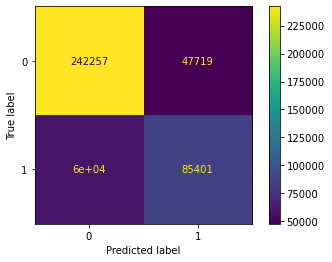

Accuracy: 0.7532991236056318
Precision: 0.6415339543269231
Recall: 0.5890211603718929
F1 Score: 0.6141570900513469
Cohens Kappa Score: 0.43332676153526595
Area Under Curve: 0.8295942492877978
Confusion Matrix:
 [[242257  47719]
 [ 59587  85401]]


[15:44:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643227205751/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Training:
---------
              precision    recall  f1-score   support

           0       0.80      0.84      0.82    260978
           1       0.64      0.58      0.61    130489

    accuracy                           0.75    391467
   macro avg       0.72      0.71      0.72    391467
weighted avg       0.75      0.75      0.75    391467



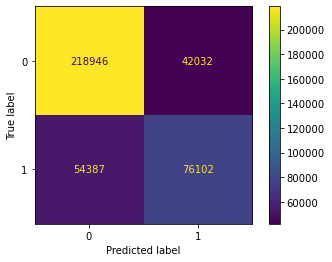

Accuracy: 0.7536982683086952
Precision: 0.6442006534951834
Recall: 0.5832062472698848
F1 Score: 0.6121879311246345
Cohens Kappa Score: 0.4323853367634679
Area Under Curve: 0.8284282501734519
Confusion Matrix:
 [[218946  42032]
 [ 54387  76102]]

Testing:
--------
              precision    recall  f1-score   support

           0       0.79      0.85      0.82     28998
           1       0.65      0.56      0.60     14499

    accuracy                           0.75     43497
   macro avg       0.72      0.70      0.71     43497
weighted avg       0.74      0.75      0.75     43497



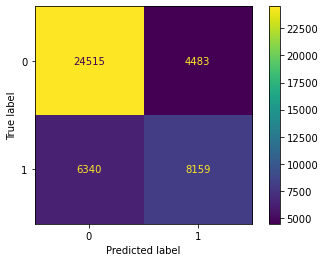

Accuracy: 0.7511782421776214
Precision: 0.6453883879133049
Recall: 0.5627284640320022
F1 Score: 0.6012306105154562
Cohens Kappa Score: 0.42163202052049376
Area Under Curve: 0.8332668188084597
Confusion Matrix:
 [[24515  4483]
 [ 6340  8159]]

Total:
------
              precision    recall  f1-score   support

           0       0.80      0.84      0.82    289976
           1       0.64      0.58      0.61    144988

    accuracy                           0.75    434964
   macro avg       0.72      0.71      0.72    434964
weighted avg       0.75      0.75      0.75    434964



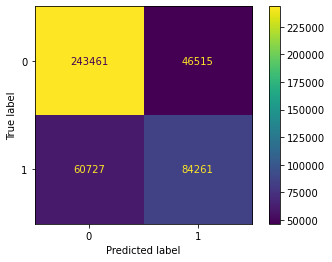

Accuracy: 0.753446262219402
Precision: 0.6443154707285741
Recall: 0.5811584406985406
F1 Score: 0.6111094994270464
Cohens Kappa Score: 0.4313182734118146
Area Under Curve: 0.8288403584230346
Confusion Matrix:
 [[243461  46515]
 [ 60727  84261]]


[15:44:33] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643227205751/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Training:
---------
              precision    recall  f1-score   support

           0       0.81      0.83      0.82    260978
           1       0.64      0.60      0.62    130489

    accuracy                           0.75    391467
   macro avg       0.72      0.72      0.72    391467
weighted avg       0.75      0.75      0.75    391467



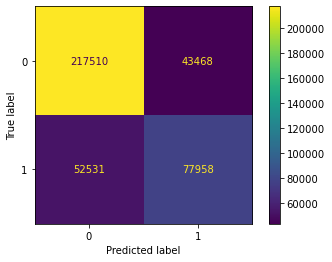

Accuracy: 0.7547711556785118
Precision: 0.6420206545550377
Recall: 0.597429668401168
F1 Score: 0.61892304944128
Cohens Kappa Score: 0.43848522011413693
Area Under Curve: 0.8306207896996293
Confusion Matrix:
 [[217510  43468]
 [ 52531  77958]]

Testing:
--------
              precision    recall  f1-score   support

           0       0.80      0.83      0.81     28998
           1       0.63      0.59      0.61     14499

    accuracy                           0.75     43497
   macro avg       0.71      0.71      0.71     43497
weighted avg       0.74      0.75      0.74     43497



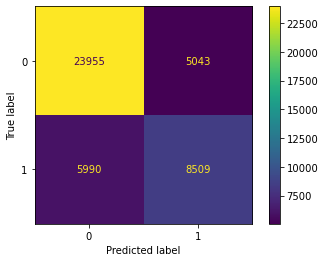

Accuracy: 0.7463503230107823
Precision: 0.6278778040141676
Recall: 0.5868680598661977
F1 Score: 0.6066806887454994
Cohens Kappa Score: 0.4198145453908043
Area Under Curve: 0.8185549240154174
Confusion Matrix:
 [[23955  5043]
 [ 5990  8509]]

Total:
------
              precision    recall  f1-score   support

           0       0.80      0.83      0.82    289976
           1       0.64      0.60      0.62    144988

    accuracy                           0.75    434964
   macro avg       0.72      0.71      0.72    434964
weighted avg       0.75      0.75      0.75    434964



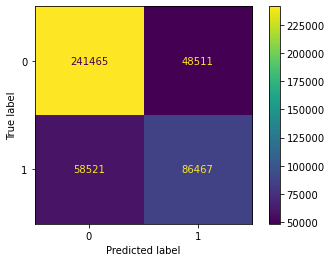

Accuracy: 0.753929060795836
Precision: 0.6406006904828935
Recall: 0.5963734929787293
F1 Score: 0.6176964345670546
Cohens Kappa Score: 0.43661635745391636
Area Under Curve: 0.8294250621654756
Confusion Matrix:
 [[241465  48511]
 [ 58521  86467]]


[15:44:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643227205751/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Training:
---------
              precision    recall  f1-score   support

           0       0.80      0.83      0.82    260978
           1       0.64      0.59      0.62    130489

    accuracy                           0.75    391467
   macro avg       0.72      0.71      0.72    391467
weighted avg       0.75      0.75      0.75    391467



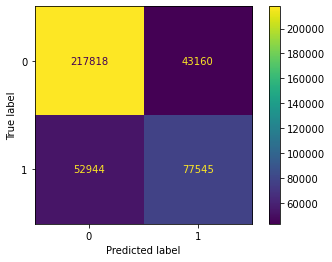

Accuracy: 0.7545029338360577
Precision: 0.6424340333871836
Recall: 0.594264650660209
F1 Score: 0.6174112438991377
Cohens Kappa Score: 0.4370797310278578
Area Under Curve: 0.8312439595764846
Confusion Matrix:
 [[217818  43160]
 [ 52944  77545]]

Testing:
--------
              precision    recall  f1-score   support

           0       0.80      0.82      0.81     28998
           1       0.62      0.59      0.60     14499

    accuracy                           0.74     43497
   macro avg       0.71      0.70      0.70     43497
weighted avg       0.74      0.74      0.74     43497



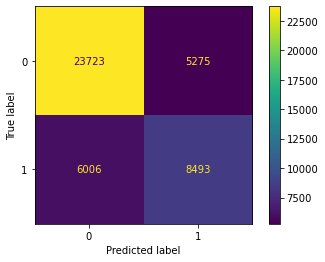

Accuracy: 0.7406487803756581
Precision: 0.6168651946542708
Recall: 0.5857645354852059
F1 Score: 0.6009127250857891
Cohens Kappa Score: 0.4090107395442242
Area Under Curve: 0.8088735542173543
Confusion Matrix:
 [[23723  5275]
 [ 6006  8493]]

Total:
------
              precision    recall  f1-score   support

           0       0.80      0.83      0.82    289976
           1       0.64      0.59      0.62    144988

    accuracy                           0.75    434964
   macro avg       0.72      0.71      0.72    434964
weighted avg       0.75      0.75      0.75    434964



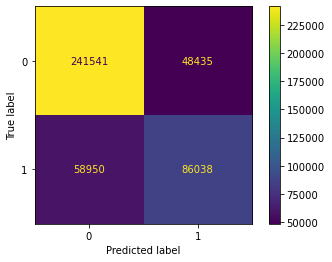

Accuracy: 0.753117499379259
Precision: 0.6398161712760182
Recall: 0.5934146274174414
F1 Score: 0.6157424470677482
Cohens Kappa Score: 0.4342569941889972
Area Under Curve: 0.829042538972818
Confusion Matrix:
 [[241541  48435]
 [ 58950  86038]]


[15:45:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643227205751/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Training:
---------
              precision    recall  f1-score   support

           0       0.80      0.84      0.82    260979
           1       0.65      0.59      0.62    130489

    accuracy                           0.76    391468
   macro avg       0.73      0.72      0.72    391468
weighted avg       0.75      0.76      0.75    391468



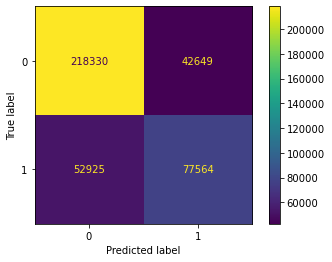

Accuracy: 0.7558574391776595
Precision: 0.6452213986840025
Recall: 0.5944102568032554
F1 Score: 0.6187744812566314
Cohens Kappa Score: 0.43964654500773825
Area Under Curve: 0.8319918261458965
Confusion Matrix:
 [[218330  42649]
 [ 52925  77564]]

Testing:
--------
              precision    recall  f1-score   support

           0       0.80      0.83      0.82     28997
           1       0.64      0.59      0.62     14499

    accuracy                           0.75     43496
   macro avg       0.72      0.71      0.72     43496
weighted avg       0.75      0.75      0.75     43496



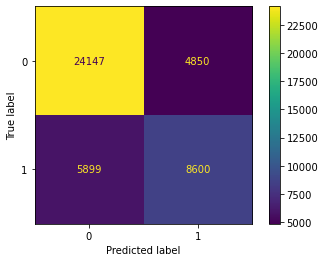

Accuracy: 0.7528738274783888
Precision: 0.6394052044609665
Recall: 0.5931443547830885
F1 Score: 0.615406633511038
Cohens Kappa Score: 0.43373048258792324
Area Under Curve: 0.8234946620511646
Confusion Matrix:
 [[24147  4850]
 [ 5899  8600]]

Total:
------
              precision    recall  f1-score   support

           0       0.80      0.84      0.82    289976
           1       0.64      0.59      0.62    144988

    accuracy                           0.76    434964
   macro avg       0.72      0.72      0.72    434964
weighted avg       0.75      0.76      0.75    434964



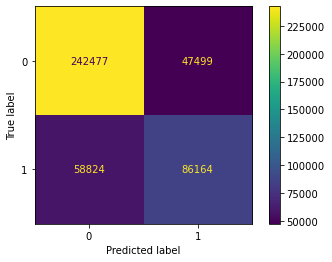

Accuracy: 0.7555590807515105
Precision: 0.6446361371508944
Recall: 0.5942836648550225
F1 Score: 0.6184366824450657
Cohens Kappa Score: 0.4390540723532298
Area Under Curve: 0.8311467572428096
Confusion Matrix:
 [[242477  47499]
 [ 58824  86164]]


[15:45:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643227205751/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Training:
---------
              precision    recall  f1-score   support

           0       0.81      0.84      0.82    260979
           1       0.65      0.60      0.62    130489

    accuracy                           0.76    391468
   macro avg       0.73      0.72      0.72    391468
weighted avg       0.75      0.76      0.75    391468



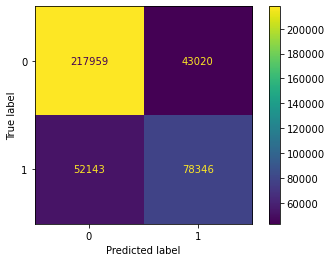

Accuracy: 0.7569073334218889
Precision: 0.6455349933259726
Recall: 0.6004030991118026
F1 Score: 0.6221516348692699
Cohens Kappa Score: 0.44331067848293115
Area Under Curve: 0.8320296339922285
Confusion Matrix:
 [[217959  43020]
 [ 52143  78346]]

Testing:
--------
              precision    recall  f1-score   support

           0       0.80      0.80      0.80     28997
           1       0.60      0.59      0.59     14499

    accuracy                           0.73     43496
   macro avg       0.70      0.70      0.70     43496
weighted avg       0.73      0.73      0.73     43496



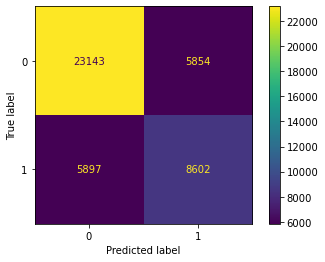

Accuracy: 0.7298372264116241
Precision: 0.5950470392916436
Recall: 0.5932822953307124
F1 Score: 0.5941633569331721
Cohens Kappa Score: 0.39168974260610756
Area Under Curve: 0.798219417391445
Confusion Matrix:
 [[23143  5854]
 [ 5897  8602]]

Total:
------
              precision    recall  f1-score   support

           0       0.81      0.83      0.82    289976
           1       0.64      0.60      0.62    144988

    accuracy                           0.75    434964
   macro avg       0.72      0.72      0.72    434964
weighted avg       0.75      0.75      0.75    434964



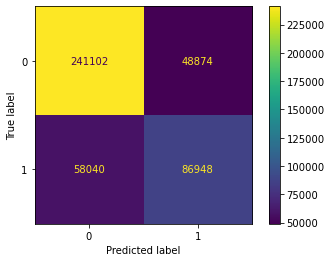

Accuracy: 0.754200347614975
Precision: 0.6401613876986055
Recall: 0.5996910089110823
F1 Score: 0.6192656956661088
Cohens Kappa Score: 0.43806960927563043
Area Under Curve: 0.8286737168349856
Confusion Matrix:
 [[241102  48874]
 [ 58040  86948]]


[15:45:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643227205751/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Training:
---------
              precision    recall  f1-score   support

           0       0.80      0.84      0.82    260979
           1       0.64      0.59      0.62    130489

    accuracy                           0.76    391468
   macro avg       0.72      0.71      0.72    391468
weighted avg       0.75      0.76      0.75    391468



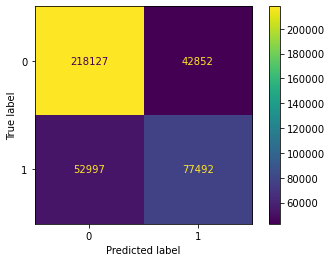

Accuracy: 0.7551549551942943
Precision: 0.6439207604866051
Recall: 0.5938584861559212
F1 Score: 0.617877233059446
Cohens Kappa Score: 0.4381780489818944
Area Under Curve: 0.8306429470947021
Confusion Matrix:
 [[218127  42852]
 [ 52997  77492]]

Testing:
--------
              precision    recall  f1-score   support

           0       0.80      0.82      0.81     28997
           1       0.62      0.58      0.60     14499

    accuracy                           0.74     43496
   macro avg       0.71      0.70      0.70     43496
weighted avg       0.74      0.74      0.74     43496



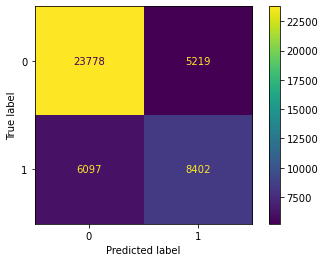

Accuracy: 0.7398381460364172
Precision: 0.61684164158285
Recall: 0.579488240568315
F1 Score: 0.5975817923186344
Cohens Kappa Score: 0.40564494116051897
Area Under Curve: 0.8151070732877339
Confusion Matrix:
 [[23778  5219]
 [ 6097  8402]]

Total:
------
              precision    recall  f1-score   support

           0       0.80      0.83      0.82    289976
           1       0.64      0.59      0.62    144988

    accuracy                           0.75    434964
   macro avg       0.72      0.71      0.72    434964
weighted avg       0.75      0.75      0.75    434964



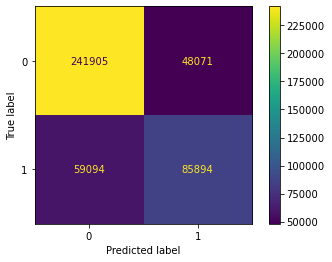

Accuracy: 0.7536232883640945
Precision: 0.6411674691150674
Recall: 0.5924214417744916
F1 Score: 0.6158313407634978
Cohens Kappa Score: 0.43491191343735336
Area Under Curve: 0.8290967190222245
Confusion Matrix:
 [[241905  48071]
 [ 59094  85894]]


[15:45:43] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643227205751/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Training:
---------
              precision    recall  f1-score   support

           0       0.80      0.84      0.82    260979
           1       0.64      0.59      0.62    130489

    accuracy                           0.75    391468
   macro avg       0.72      0.71      0.72    391468
weighted avg       0.75      0.75      0.75    391468



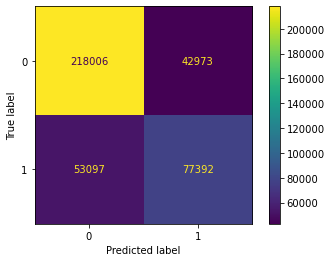

Accuracy: 0.7545904135203899
Precision: 0.6429776097702821
Recall: 0.5930921380346236
F1 Score: 0.6170282315609876
Cohens Kappa Score: 0.4369057547596401
Area Under Curve: 0.8307291070737635
Confusion Matrix:
 [[218006  42973]
 [ 53097  77392]]

Testing:
--------
              precision    recall  f1-score   support

           0       0.80      0.84      0.82     28997
           1       0.64      0.58      0.61     14499

    accuracy                           0.75     43496
   macro avg       0.72      0.71      0.72     43496
weighted avg       0.75      0.75      0.75     43496



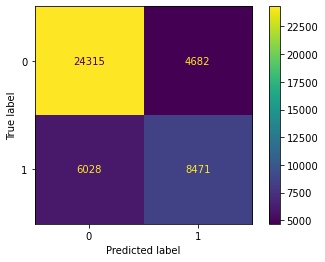

Accuracy: 0.7537704616516461
Precision: 0.6440355812362198
Recall: 0.5842471894613421
F1 Score: 0.6126862433097064
Cohens Kappa Score: 0.43282713113529414
Area Under Curve: 0.8286849028998943
Confusion Matrix:
 [[24315  4682]
 [ 6028  8471]]

Total:
------
              precision    recall  f1-score   support

           0       0.80      0.84      0.82    289976
           1       0.64      0.59      0.62    144988

    accuracy                           0.75    434964
   macro avg       0.72      0.71      0.72    434964
weighted avg       0.75      0.75      0.75    434964



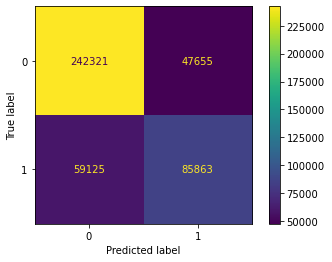

Accuracy: 0.7545084190875567
Precision: 0.6430818316631466
Recall: 0.5922076309763566
F1 Score: 0.6165971289667009
Cohens Kappa Score: 0.43649930868523545
Area Under Curve: 0.8305283257896632
Confusion Matrix:
 [[242321  47655]
 [ 59125  85863]]


[15:45:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643227205751/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Training:
---------
              precision    recall  f1-score   support

           0       0.80      0.84      0.82    260978
           1       0.64      0.59      0.62    130490

    accuracy                           0.75    391468
   macro avg       0.72      0.71      0.72    391468
weighted avg       0.75      0.75      0.75    391468



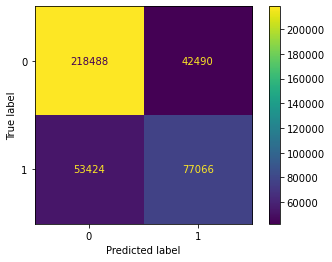

Accuracy: 0.7549889135254989
Precision: 0.6446016929305095
Recall: 0.5905893171890566
F1 Score: 0.616414579717332
Cohens Kappa Score: 0.4369314127770203
Area Under Curve: 0.8303880941547741
Confusion Matrix:
 [[218488  42490]
 [ 53424  77066]]

Testing:
--------
              precision    recall  f1-score   support

           0       0.80      0.84      0.82     28998
           1       0.64      0.57      0.61     14498

    accuracy                           0.75     43496
   macro avg       0.72      0.71      0.71     43496
weighted avg       0.75      0.75      0.75     43496



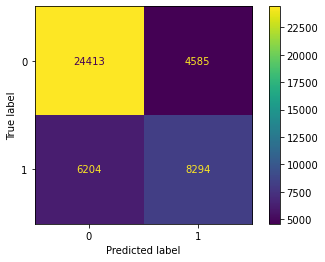

Accuracy: 0.7519542026853044
Precision: 0.6439940989207237
Recall: 0.5720789074355084
F1 Score: 0.6059100704971326
Cohens Kappa Score: 0.42585422116113736
Area Under Curve: 0.83075570255196
Confusion Matrix:
 [[24413  4585]
 [ 6204  8294]]

Total:
------
              precision    recall  f1-score   support

           0       0.80      0.84      0.82    289976
           1       0.64      0.59      0.62    144988

    accuracy                           0.75    434964
   macro avg       0.72      0.71      0.72    434964
weighted avg       0.75      0.75      0.75    434964



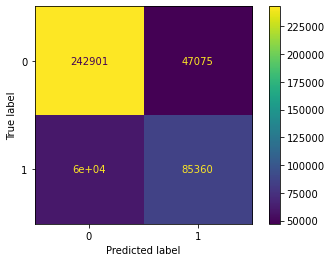

Accuracy: 0.7546854452322491
Precision: 0.6445426058066221
Recall: 0.588738378348553
F1 Score: 0.6153779607314461
Cohens Kappa Score: 0.4358308703399195
Area Under Curve: 0.8304019449317708
Confusion Matrix:
 [[242901  47075]
 [ 59628  85360]]


[15:46:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1643227205751/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Training:
---------
              precision    recall  f1-score   support

           0       0.80      0.84      0.82    260978
           1       0.64      0.59      0.62    130490

    accuracy                           0.75    391468
   macro avg       0.72      0.71      0.72    391468
weighted avg       0.75      0.75      0.75    391468



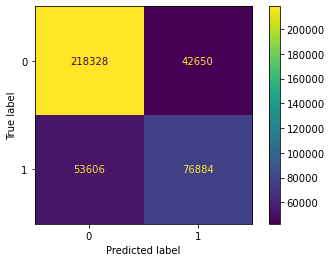

Accuracy: 0.7541152788989138
Precision: 0.6431977512674218
Recall: 0.5891945742968809
F1 Score: 0.6150129587559594
Cohens Kappa Score: 0.43489935458513873
Area Under Curve: 0.829548868068441
Confusion Matrix:
 [[218328  42650]
 [ 53606  76884]]

Testing:
--------
              precision    recall  f1-score   support

           0       0.80      0.84      0.82     28998
           1       0.65      0.58      0.61     14498

    accuracy                           0.76     43496
   macro avg       0.73      0.71      0.72     43496
weighted avg       0.75      0.76      0.75     43496



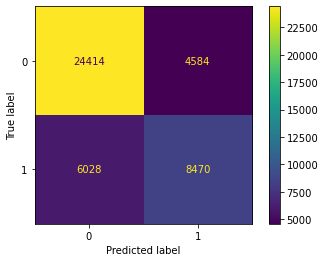

Accuracy: 0.7560235423947029
Precision: 0.6488432664317451
Recall: 0.5842185128983308
F1 Score: 0.6148373983739838
Cohens Kappa Score: 0.43702121814666184
Area Under Curve: 0.8317055578042966
Confusion Matrix:
 [[24414  4584]
 [ 6028  8470]]

Total:
------
              precision    recall  f1-score   support

           0       0.80      0.84      0.82    289976
           1       0.64      0.59      0.61    144988

    accuracy                           0.75    434964
   macro avg       0.72      0.71      0.72    434964
weighted avg       0.75      0.75      0.75    434964



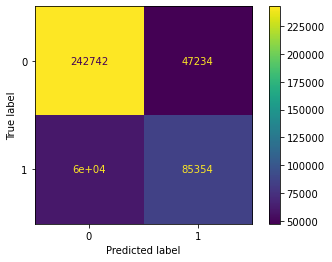

Accuracy: 0.7543061034936225
Precision: 0.6437535825263221
Recall: 0.58869699561343
F1 Score: 0.6149955327549932
Cohens Kappa Score: 0.4351107916102842
Area Under Curve: 0.8297669972491786
Confusion Matrix:
 [[242742  47234]
 [ 59634  85354]]




In [25]:
X = df.drop(['Asthma', 'KidneyDisease', 'SkinCancer'], axis=1)
y_asthma = df['Asthma'].map({
    'Yes': 1,
    'No' : 0
})
y_kidneydisease = df['KidneyDisease'].map({
    'Yes': 1,
    'No' : 0
})
y_skincancer = df['SkinCancer'].map({
    'Yes': 1,
    'No' : 0
})

print("The number of classes before fit {}".format(Counter(y_skincancer)))
os = RandomOverSampler(0.5)
X, y_skincancer = os.fit_resample(X, y_skincancer)
print("The number of classes after fit {}\n\n".format(Counter(y_skincancer)))

skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X, y_skincancer)

clf_skin = XGBClassifier()

for train_idx, test_idx in skf.split(X, y_skincancer):
    X_train = X.iloc[train_idx]
    y_train = y_skincancer.iloc[train_idx]    
    X_test = X.iloc[test_idx]
    y_test = y_skincancer.iloc[test_idx]
    clf_skin.fit(X_train, y_train)
    pred_test = clf_skin.predict(X_test)
    pred_train = clf_skin.predict(X_train)
    pred = clf_skin.predict(X)
    print(f'\nTraining:')
    print(f'---------')
    print(classification_report(y_train, pred_train))
    plot_confusion_matrix(clf_skin, X_train, y_train)
    plt.show()
    eval = evaluate_model(clf_skin, X_train, y_train)
    # Print result
    print('Accuracy:', eval['acc'])
    print('Precision:', eval['prec'])
    print('Recall:', eval['rec'])
    print('F1 Score:', eval['f1'])
    print('Cohens Kappa Score:', eval['kappa'])
    print('Area Under Curve:', eval['auc'])
    print('Confusion Matrix:\n', eval['cm'])
    
    print(f'\nTesting:')
    print(f'--------')
    print(classification_report(y_test, pred_test))
    plot_confusion_matrix(clf_skin, X_test, y_test)
    plt.show()
    eval = evaluate_model(clf_skin, X_test, y_test)
    # Print result
    print('Accuracy:', eval['acc'])
    print('Precision:', eval['prec'])
    print('Recall:', eval['rec'])
    print('F1 Score:', eval['f1'])
    print('Cohens Kappa Score:', eval['kappa'])
    print('Area Under Curve:', eval['auc'])
    print('Confusion Matrix:\n', eval['cm'])
    
    print(f'\nTotal:')
    print(f'------')
    print(classification_report(y_skincancer, pred))
    plot_confusion_matrix(clf_skin, X, y_skincancer)
    plt.show()
    eval = evaluate_model(clf_skin, X, y_skincancer)
    # Print result
    print('Accuracy:', eval['acc'])
    print('Precision:', eval['prec'])
    print('Recall:', eval['rec'])
    print('F1 Score:', eval['f1'])
    print('Cohens Kappa Score:', eval['kappa'])
    print('Area Under Curve:', eval['auc'])
    print('Confusion Matrix:\n', eval['cm'])
    print(f'\n================================================\n')

In [26]:
df['Asthma'].value_counts()

No     276923
Yes     42872
Name: Asthma, dtype: int64

In [27]:
df['KidneyDisease'].value_counts()

No     308016
Yes     11779
Name: KidneyDisease, dtype: int64

In [28]:
df['SkinCancer'].value_counts()

No     289976
Yes     29819
Name: SkinCancer, dtype: int64

In [29]:
import pickle

#### Pickling

In [31]:
with open('model_asthma', 'wb') as f:
    pickle.dump(clf_asthma, f)

In [32]:
with open('model_kidney', 'wb') as f:
    pickle.dump(clf_kidney, f)

In [33]:
with open('model_skin', 'wb') as f:
    pickle.dump(clf_skin, f)

#### Testing

In [57]:
with open('model_asthma', 'rb') as f:
    model_asthma = pickle.load(f)
    
with open('model_kidney', 'rb') as f:
    model_kidney = pickle.load(f)
    
with open('model_skin', 'rb') as f:
    model_skin = pickle.load(f)

In [58]:
X = df.drop(['Asthma', 'KidneyDisease', 'SkinCancer'], axis=1)
y_asthma = df['Asthma'].map({
    'Yes': 1,
    'No' : 0
})
y_kidneydisease = df['KidneyDisease'].map({
    'Yes': 1,
    'No' : 0
})
y_skincancer = df['SkinCancer'].map({
    'Yes': 1,
    'No' : 0
})

In [59]:
import numpy as np
X = np.array(X)
X

array([[0.00000e+00, 1.66000e+01, 1.00000e+00, ..., 1.00000e+00,
        1.13858e+05, 5.00000e+00],
       [0.00000e+00, 2.03400e+01, 0.00000e+00, ..., 1.00000e+00,
        1.13858e+05, 7.00000e+00],
       [0.00000e+00, 2.65800e+01, 1.00000e+00, ..., 1.00000e+00,
        3.46770e+04, 8.00000e+00],
       ...,
       [0.00000e+00, 2.42400e+01, 0.00000e+00, ..., 1.00000e+00,
        9.31290e+04, 6.00000e+00],
       [0.00000e+00, 3.28100e+01, 0.00000e+00, ..., 0.00000e+00,
        9.31290e+04, 1.20000e+01],
       [0.00000e+00, 4.65600e+01, 0.00000e+00, ..., 1.00000e+00,
        9.31290e+04, 8.00000e+00]])

In [61]:
pred = model_asthma.predict(X)

In [68]:
X = df.drop(['Asthma', 'KidneyDisease', 'SkinCancer'], axis=1)
y_asthma = df['Asthma'].map({
    'Yes': 1,
    'No' : 0
})
y_kidneydisease = df['KidneyDisease'].map({
    'Yes': 1,
    'No' : 0
})
y_skincancer = df['SkinCancer'].map({
    'Yes': 1,
    'No' : 0
})

model_asthma.predict(np.array([X.iloc[0]]))

array([1])

In [69]:
y_asthma[0]

1